In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Path to the folder containing your CSV files
folder_path = '/Users/riyakoduru/Downloads/ka-highway18'  # Change this to the path of your folder

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        
        # Load the dataset
        data = pd.read_csv(file_path)
        
        # Select numerical features for PCA, assuming all columns except the first are features
        features = data.columns[1:]
        X = data[features]
        
        # Standardize the features
        X_standardized = StandardScaler().fit_transform(X)
        
        # Perform PCA
        pca = PCA()
        principal_components = pca.fit_transform(X_standardized)
        
        # Create a DataFrame for the principal components
        principal_df = pd.DataFrame(data=principal_components,
                                    columns=['PC' + str(i) for i in range(1, len(features) + 1)])
        
        # Explained variance ratio
        explained_variance = pca.explained_variance_ratio_
        
        # Display results
        print(f"Results for {filename}:")
        print(principal_df.head())
        print(explained_variance)
        print("\n")


Results for attack-lhs_8511_8513_0.3_1.2.csv:
         PC1         PC2       PC3       PC4       PC5       PC6       PC7  \
0  16.443335  253.632615  1.775955 -1.927976  0.916667 -7.882812  1.625565   
1   3.523090    0.571078  1.048278  1.735119 -0.103772  8.715621 -2.838702   
2   3.523090    0.571078  1.048278  1.735119 -0.103772  8.715621 -2.838702   
3   3.523090    0.571078  1.048278  1.735119 -0.103772  8.715621 -2.838702   
4   3.523090    0.571078  1.048278  1.735119 -0.103772  8.715621 -2.838702   

        PC8       PC9      PC10  ...      PC17      PC18      PC19      PC20  \
0 -0.513461 -0.000064  1.063505  ... -0.021641  0.016749 -0.008642 -0.000216   
1  1.684004  1.153627 -3.220354  ... -0.078510 -0.062033  0.016698  0.105465   
2  1.684004  1.153627 -3.220354  ... -0.078510 -0.062033  0.016698  0.105465   
3  1.684004  1.153627 -3.220354  ... -0.078510 -0.062033  0.016698  0.105465   
4  1.684004  1.153627 -3.220354  ... -0.078510 -0.062033  0.016698  0.105465   

    

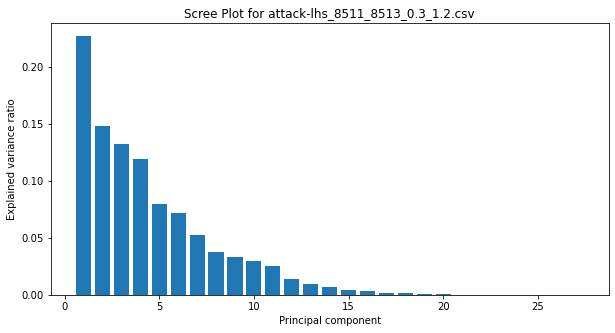

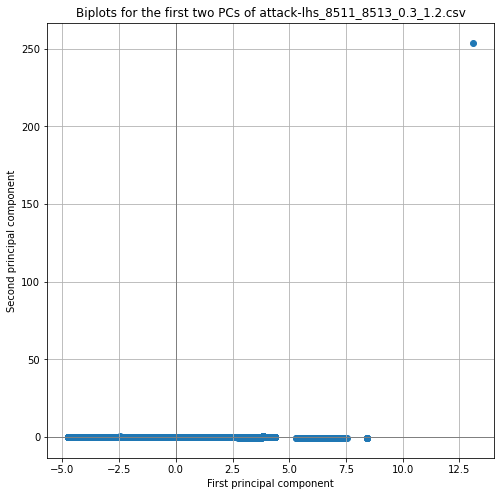

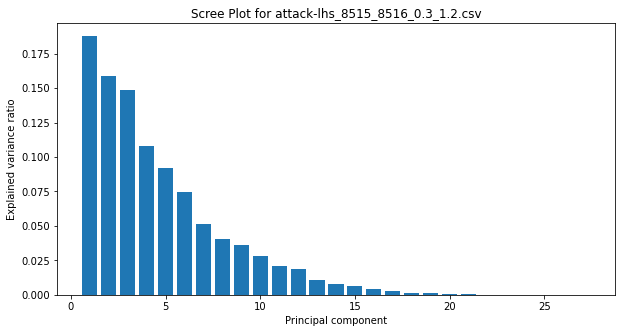

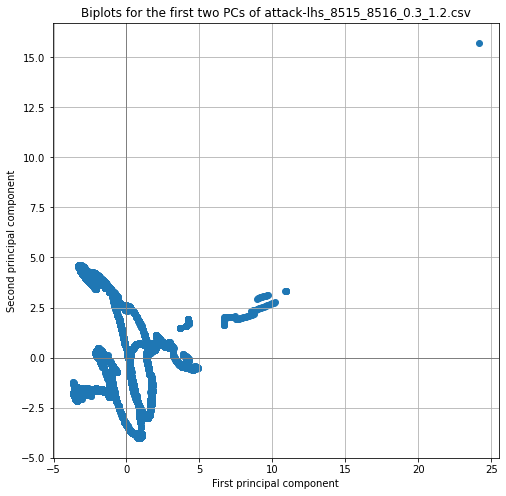

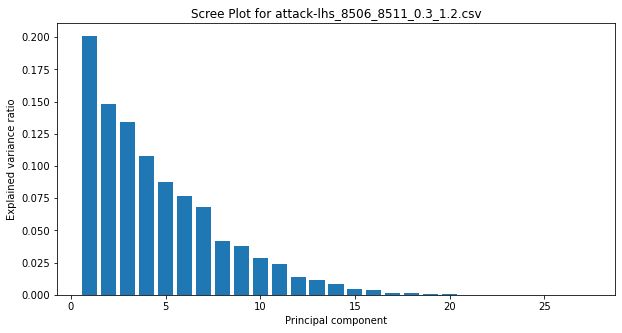

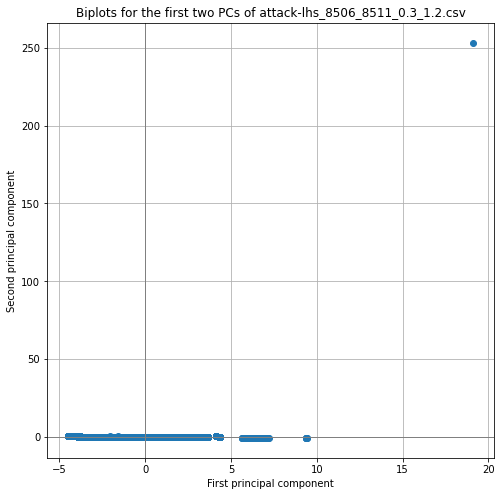

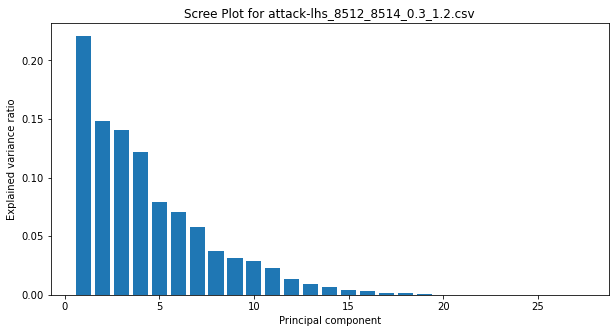

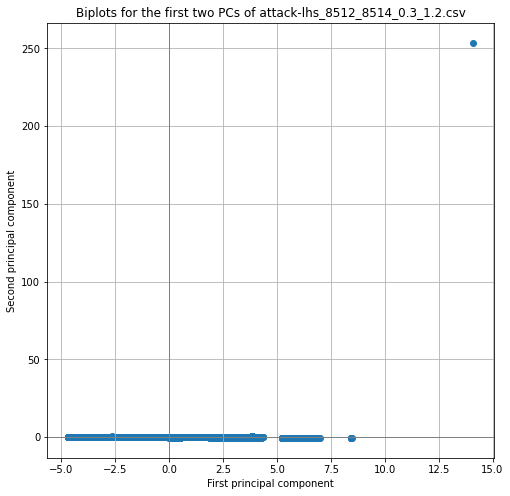

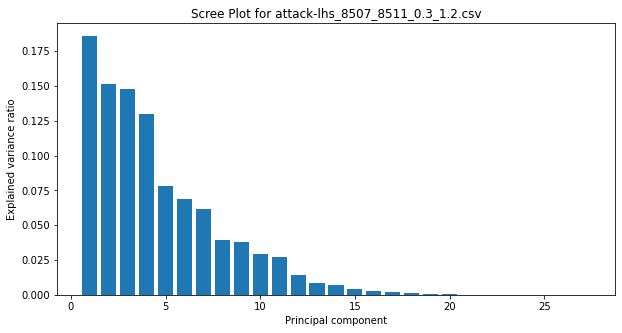

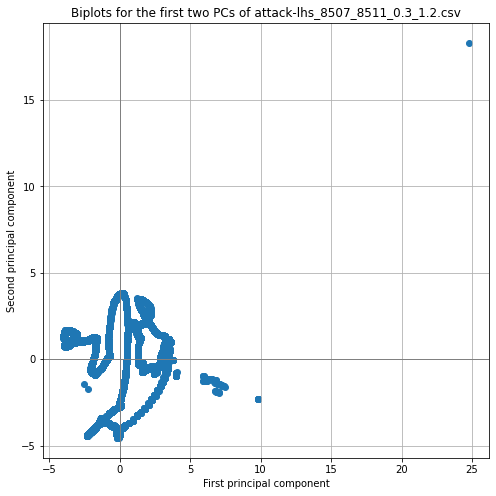

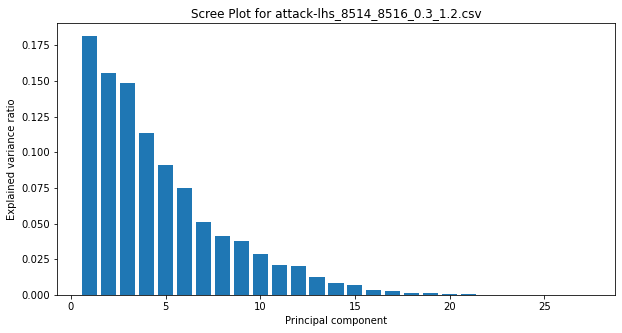

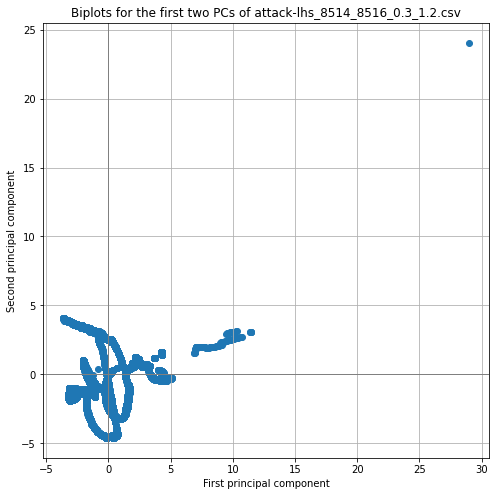

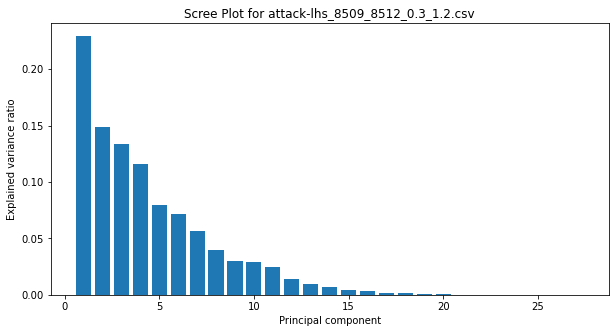

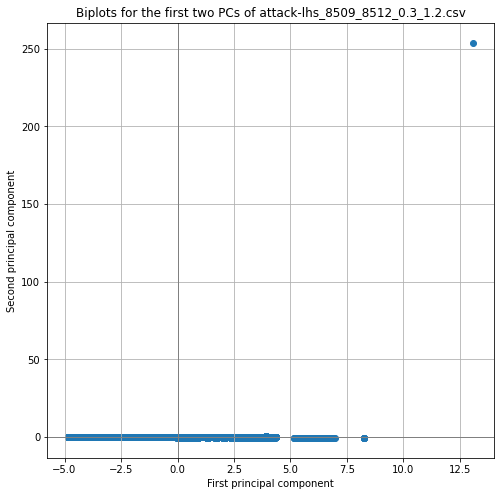

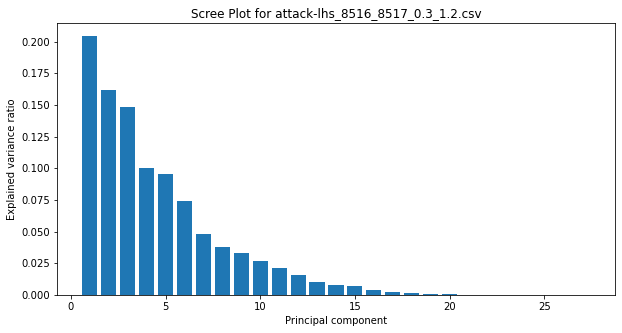

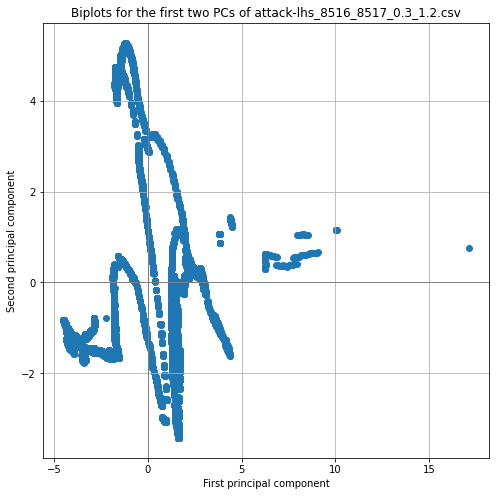

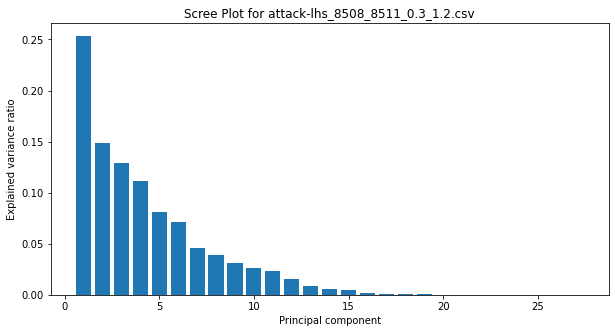

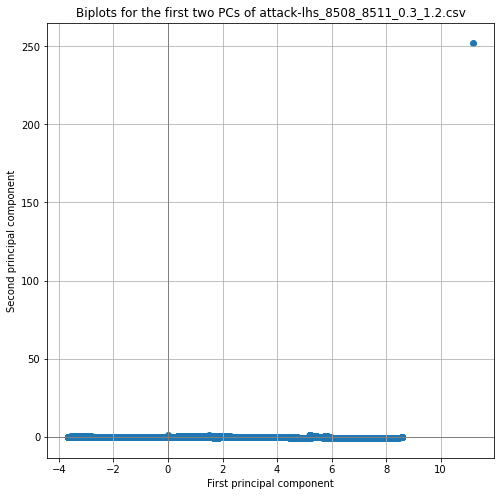

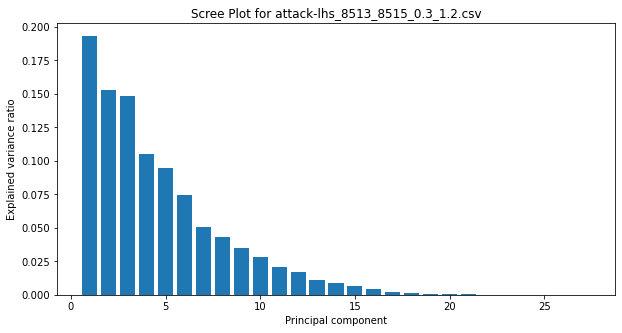

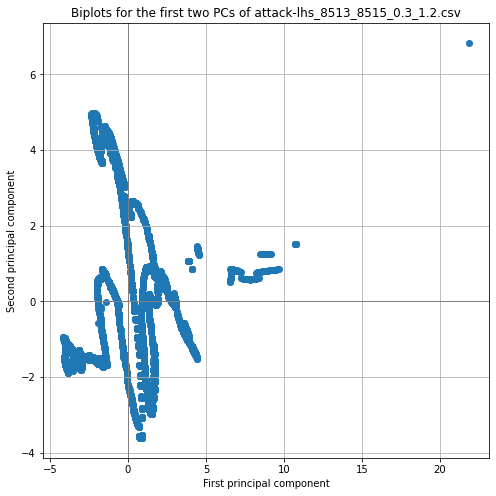

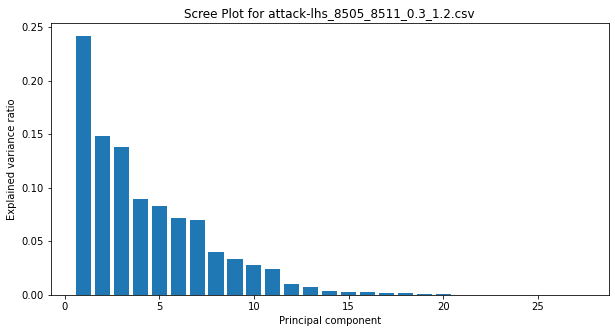

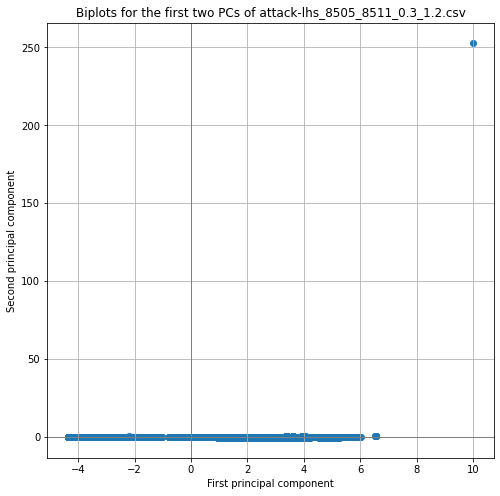

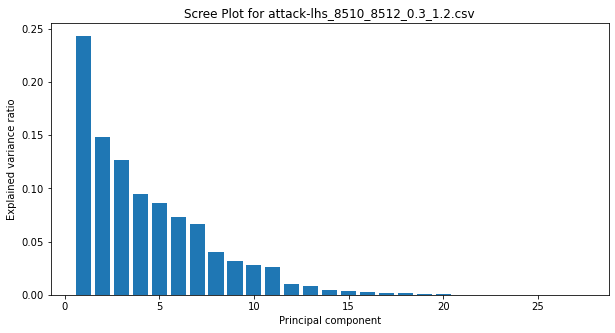

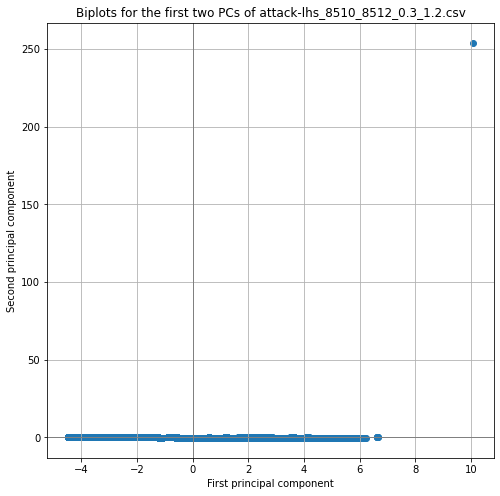

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import matplotlib.pyplot as plt

# Set the folder path to your CSV files
folder_path = r'/Users/riyakoduru/Downloads/ka-highway18'  # Use your path

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Load the dataset
        data = pd.read_csv(file_path)
        
        # Select all features for PCA
        features = data.columns
        X = data[features]
        
        # Standardize the features
        X_standardized = StandardScaler().fit_transform(X)
        
        # Perform PCA
        pca = PCA()
        principal_components = pca.fit_transform(X_standardized)
        
        # Scree plot of the explained variance ratios
        plt.figure(figsize=(10, 5))
        plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal component')
        plt.title(f'Scree Plot for {filename}')
        plt.show()
        
        # Biplots for the first two principal components
        plt.figure(figsize=(8, 8))
        plt.scatter(principal_components[:, 0], principal_components[:, 1])
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.title(f'Biplots for the first two PCs of {filename}')
        plt.axhline(0, color='grey', lw=1)
        plt.axvline(0, color='grey', lw=1)
        plt.grid(True)
        plt.show()
